# Train detector

## Mount Google Drive
To begin, let's mount our google drive using the `mount` function from `google.colab.drive`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Clone/update repository


In order to get access to scripts used in this notebook we need to clone the required GitHub repository. This step is needed only the first time.

In [ ]:
%%bash

DIR="/content/gdrive/MyDrive/CVCS/project_folder"
if [ -d "$DIR" ]; then
  rm -r -f "$DIR"
fi
mkdir $DIR
cd $DIR
git clone https://github.com/sir3mat/cvcs.git

Cloning into 'cvcs'...


## Update and install required dependencies

In [ ]:
%%bash
cd /content/gdrive/MyDrive/CVCS/project_folder
pip install coloredlogs torchinfo
pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
chdir: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


## Execute script
Here we make our script executable from Colab environment and start training our detection model.
The output will be stored in the `TrainLog.txt` file.

In [ ]:
%%bash
chmod 755 /content/gdrive/MyDrive/CVCS/project_folder/cvcs/scripts/train_detector.sh
cd /content/gdrive/MyDrive/CVCS/project_folder/cvcs
scripts/train_detector.sh > /content/gdrive/MyDrive/CVCS/TrainLog.txt

Process is terminated.


In [ ]:
cd /content/gdrive/MyDrive/CVCS/project_folder/cvcs

/content/gdrive/MyDrive/CVCS/project_folder/cvcs


## Show result on test data
Fine tuning of a Faster R-CNN with a Resnet50 as a backbone.
- Model weights : coco 
- Backbone weights: ImagenetV2
- Training Dataset: Portion of MOTSynth1
- test data in this example : MOT17-09

```
======================================================================================================================================================
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Kernel Shape         Trainable
======================================================================================================================================================
FasterRCNN (FasterRCNN)                            [8, 3, 1920, 1080]   --                   --                   --                   Partial
├─GeneralizedRCNNTransform (transform)             [8, 3, 1920, 1080]   --                   --                   --                   --
├─BackboneWithFPN (backbone)                       [8, 3, 1344, 768]    [8, 256, 21, 12]     --                   --                   Partial
│    └─IntermediateLayerGetter (body)              [8, 3, 1344, 768]    [8, 2048, 42, 24]    --                   --                   Partial
│    │    └─Conv2d (conv1)                         [8, 3, 1344, 768]    [8, 64, 672, 384]    (9,408)              [7, 7]               False
│    │    └─BatchNorm2d (bn1)                      [8, 64, 672, 384]    [8, 64, 672, 384]    (128)                --                   False
│    │    └─ReLU (relu)                            [8, 64, 672, 384]    [8, 64, 672, 384]    --                   --                   --
│    │    └─MaxPool2d (maxpool)                    [8, 64, 672, 384]    [8, 64, 336, 192]    --                   3                    --
│    │    └─Sequential (layer1)                    [8, 64, 336, 192]    [8, 256, 336, 192]   (215,808)            --                   False
│    │    └─Sequential (layer2)                    [8, 256, 336, 192]   [8, 512, 168, 96]    (1,219,584)          --                   False
│    │    └─Sequential (layer3)                    [8, 512, 168, 96]    [8, 1024, 84, 48]    (7,098,368)          --                   False
│    │    └─Sequential (layer4)                    [8, 1024, 84, 48]    [8, 2048, 42, 24]    14,964,736           --                   True
│    └─FeaturePyramidNetwork (fpn)                 --                   [8, 256, 21, 12]     --                   --                   False
│    │    └─ModuleList (inner_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (layer_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (inner_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (layer_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (inner_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (layer_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (inner_blocks)              --                   --                   (recursive)          --                   False
│    │    └─ModuleList (layer_blocks)              --                   --                   (recursive)          --                   False
│    │    └─LastLevelMaxPool (extra_blocks)        [8, 256, 336, 192]   [8, 256, 336, 192]   --                   --                   --
├─RegionProposalNetwork (rpn)                      --                   [1000, 4]            --                   --                   False
│    └─RPNHead (head)                              [8, 256, 336, 192]   [8, 3, 336, 192]     --                   --                   False
│    │    └─Sequential (conv)                      [8, 256, 336, 192]   [8, 256, 336, 192]   (1,180,160)          --                   False
│    │    └─Conv2d (cls_logits)                    [8, 256, 336, 192]   [8, 3, 336, 192]     (771)                [1, 1]               False
│    │    └─Conv2d (bbox_pred)                     [8, 256, 336, 192]   [8, 12, 336, 192]    (3,084)              [1, 1]               False
│    │    └─Sequential (conv)                      [8, 256, 168, 96]    [8, 256, 168, 96]    (recursive)          --                   False
│    │    └─Conv2d (cls_logits)                    [8, 256, 168, 96]    [8, 3, 168, 96]      (recursive)          [1, 1]               False
│    │    └─Conv2d (bbox_pred)                     [8, 256, 168, 96]    [8, 12, 168, 96]     (recursive)          [1, 1]               False
│    │    └─Sequential (conv)                      [8, 256, 84, 48]     [8, 256, 84, 48]     (recursive)          --                   False
│    │    └─Conv2d (cls_logits)                    [8, 256, 84, 48]     [8, 3, 84, 48]       (recursive)          [1, 1]               False
│    │    └─Conv2d (bbox_pred)                     [8, 256, 84, 48]     [8, 12, 84, 48]      (recursive)          [1, 1]               False
│    │    └─Sequential (conv)                      [8, 256, 42, 24]     [8, 256, 42, 24]     (recursive)          --                   False
│    │    └─Conv2d (cls_logits)                    [8, 256, 42, 24]     [8, 3, 42, 24]       (recursive)          [1, 1]               False
│    │    └─Conv2d (bbox_pred)                     [8, 256, 42, 24]     [8, 12, 42, 24]      (recursive)          [1, 1]               False
│    │    └─Sequential (conv)                      [8, 256, 21, 12]     [8, 256, 21, 12]     (recursive)          --                   False
│    │    └─Conv2d (cls_logits)                    [8, 256, 21, 12]     [8, 3, 21, 12]       (recursive)          [1, 1]               False
│    │    └─Conv2d (bbox_pred)                     [8, 256, 21, 12]     [8, 12, 21, 12]      (recursive)          [1, 1]               False
│    └─AnchorGenerator (anchor_generator)          --                   [257796, 4]          --                   --                   --
├─RoIHeads (roi_heads)                             --                   --                   --                   --                   Partial
│    └─MultiScaleRoIAlign (box_roi_pool)           --                   [8000, 256, 7, 7]    --                   --                   --
│    └─FastRCNNConvFCHead (box_head)               [8000, 256, 7, 7]    [8000, 1024]         --                   --                   False
│    │    └─Conv2dNormActivation (0)               [8000, 256, 7, 7]    [8000, 256, 7, 7]    (590,336)            --                   False
│    │    └─Conv2dNormActivation (1)               [8000, 256, 7, 7]    [8000, 256, 7, 7]    (590,336)            --                   False
│    │    └─Conv2dNormActivation (2)               [8000, 256, 7, 7]    [8000, 256, 7, 7]    (590,336)            --                   False
│    │    └─Conv2dNormActivation (3)               [8000, 256, 7, 7]    [8000, 256, 7, 7]    (590,336)            --                   False
│    │    └─Flatten (4)                            [8000, 256, 7, 7]    [8000, 12544]        --                   --                   --
│    │    └─Linear (5)                             [8000, 12544]        [8000, 1024]         (12,846,080)         --                   False
│    │    └─ReLU (6)                               [8000, 1024]         [8000, 1024]         --                   --                   --
│    └─FastRCNNPredictor (box_predictor)           [8000, 1024]         [8000, 2]            --                   --                   True
│    │    └─Linear (cls_score)                     [8000, 1024]         [8000, 2]            2,050                --                   True
│    │    └─Linear (bbox_pred)                     [8000, 1024]         [8000, 8]            8,200                --                   True
======================================================================================================================================================
Total params: 43,256,153
Trainable params: 14,974,986
Non-trainable params: 28,281,167
Total mult-adds (T): 2.98
======================================================================================================================================================
Input size (MB): 199.07
Forward/backward pass size (MB): 43544.40
Params size (MB): 173.02
Estimated Total Size (MB): 43916.49
======================================================================================================================================================
```

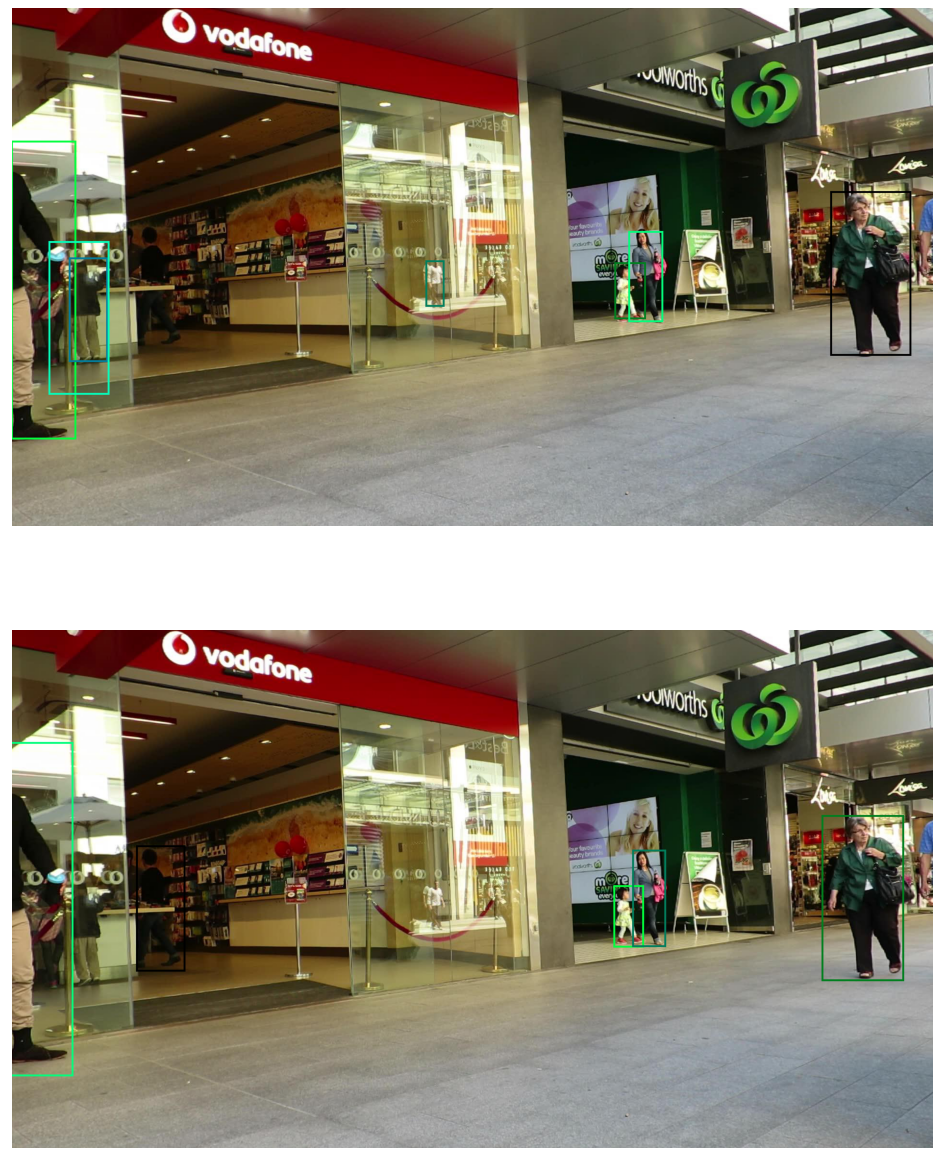

In [ ]:
import torch
from torchvision.models.detection.faster_rcnn import fasterrcnn_resnet50_fpn_v2, FasterRCNN, FastRCNNPredictor
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.models.resnet import ResNet50_Weights
from tools.train_detector import create_dataset, create_data_loader, get_transform
from src.detection.graph_utils import show, add_bbox
import matplotlib.pyplot as plt
import matplotlib
import logging
from torchvision.utils import draw_bounding_boxes
from torchvision import transforms

ds_val = create_dataset(
        "MOT17", get_transform(False, "hflip"), "test")
data_loader_val = create_data_loader(ds_val, "test", 1, 0)

device = torch.device("cuda")
model = fasterrcnn_resnet50_fpn_v2()
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2) 
checkpoint = torch.load("/content/gdrive/MyDrive/CVCS/storage/motsynth_output/detection_logs/fasterrcnn_training/checkpoint.pth", map_location="cpu")
model.load_state_dict(checkpoint["model"])
model = model.eval()
model.to(device)

imgs_bbox = []
for imgs, target in data_loader_val:
        with torch.no_grad():
            prediction = model([imgs[0].to(device)])[0]
        imgs_bbox.append(add_bbox(imgs[0], prediction, 0.7))
        imgs_bbox.append(add_bbox(imgs[0], target[0]['boxes']))
        break

show(imgs_bbox)